<a href="https://colab.research.google.com/github/Kartel7/Moscow_SUHI/blob/en/suhi_area_dynamics_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of trends in the area of SUHI (surface urban heat island) within parts of the Moscow agglomeration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as st

In [ ]:
df = pd.read_csv(r"D:\Kursach_2\analysis\SUHI_Areas.csv")

# Input data: SUHI area by agglomeration parts (Retrieved through GEE)

In [ ]:
types = {'suburb': 'Suburb', 'moscow': 'Moscow', 'newmsc': 'New Moscow'}

df['type'] = df['agl'].map(types)

# Assigning normal names to parts of the agglomeration

In [ ]:
df

,year,agl,square,type
0,1984.0,suburb,1338.337832,Suburb
1,1984.0,moscow,792.390903,Moscow
2,1984.0,newmsc,216.683514,New Moscow
3,1985.0,suburb,2335.891926,Suburb
4,1985.0,moscow,651.335353,Moscow
...,...,...,...,...
109,2023.0,moscow,939.416248,Moscow
110,2023.0,newmsc,372.146616,New Moscow
111,2024.0,suburb,2733.896001,Suburb
112,2024.0,moscow,938.682143,Moscow


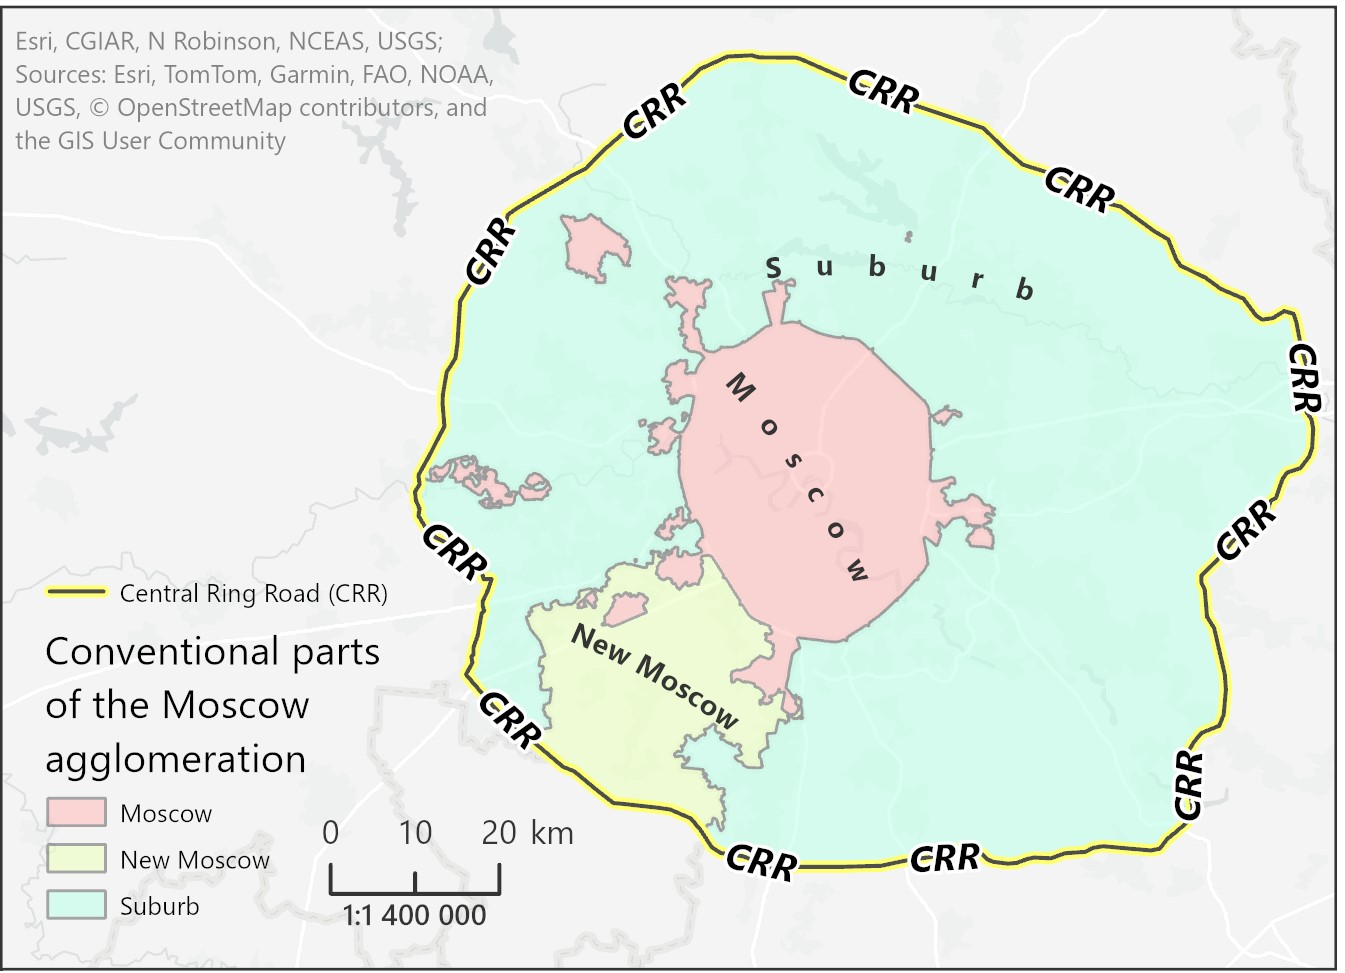

In [ ]:
df['year'] = df['year'].astype(int)

In [ ]:
df = df.set_index('type')

# Look by agglomeration parts

In [ ]:
zones = df.index.unique().tolist()
zones

['Suburb', 'Moscow', 'New Moscow']

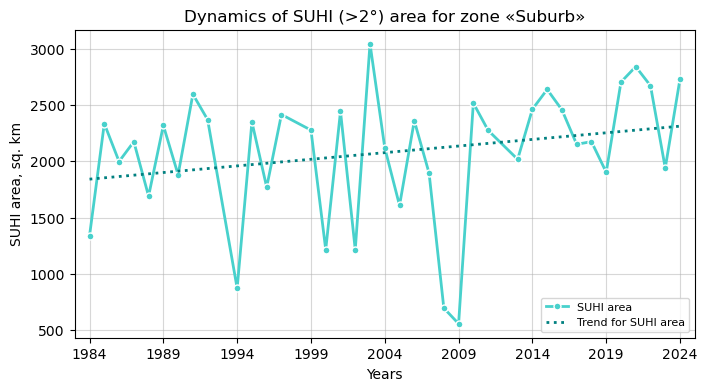

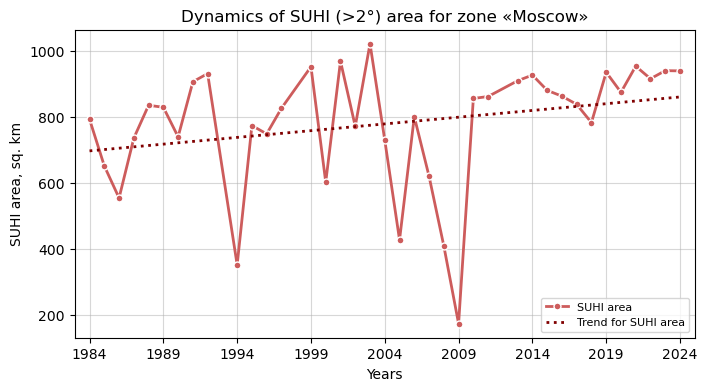

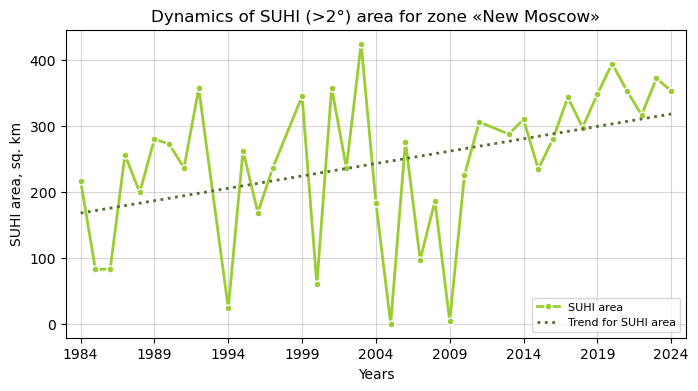

In [ ]:
# Graphs and linears trends for SUHI areas by agglomeration parts

results = []
colors = {'Suburb': 'mediumturquoise', 'Moscow': 'indianred', 'New Moscow': 'yellowgreen'}
colors_trend = {'Suburb': 'teal', 'Moscow': 'maroon', 'New Moscow': 'darkolivegreen'}


for zone in zones:

    data = df.loc[zone]
    x = data['year']
    y = data['square']

    fig, ax = plt.subplots(figsize=(8,4))

    ax.plot(x, y, lw=2, color=colors[zone], marker='.', ms=10, markeredgecolor = 'white')

    ax.set_xlim(1983,2025)
   #ax.set_ylim(15,32)
    ax.set_xticks(np.arange(1984,2025,5))
    ax.grid('lightgrey', alpha=0.5)

    # Linear regression
    slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

    ax.plot(x, slope*x + intercept, ls=':', lw=2, color=colors_trend[zone])

    # Save a result
    results.append({
        'zone': zone,
        'n_points': len(data),
        'slope': slope,
        'intercept': intercept,
        'r_value': r_value,
        'p_value': p_value,
        'std_err': std_err
    })

    ax.legend(['SUHI area','Trend for SUHI area'], loc=4, prop={'size': 8})
    ax.set_title(f'Dynamics of SUHI (>2°) area for zone «{zone}»')
    ax.set_ylabel('SUHI area, sq. km')
    ax.set_xlabel('Years')

    plt.savefig(rf'D:\Kursach_2\newpics\{zone}.png', bbox_inches="tight")

# To DataFrame
results_df = pd.DataFrame(results)

In [ ]:
results_df

,zone,n_points,slope,intercept,r_value,p_value,std_err
0,Suburb,38,11.780327,-21530.363999,0.244413,0.139177,7.789457
1,Moscow,38,4.075859,-7389.710025,0.264009,0.109231,2.481766
2,New Moscow,38,3.748855,-7269.449467,0.409024,0.010779,1.393938


## Autocorrelation & distribution test

In [ ]:
from statsmodels.stats.stattools import durbin_watson

In [ ]:
df=df.reset_index()

In [ ]:
df

,type,year,agl,square
0,Suburb,1984,suburb,1338.337832
1,Moscow,1984,moscow,792.390903
2,New Moscow,1984,newmsc,216.683514
3,Suburb,1985,suburb,2335.891926
4,Moscow,1985,moscow,651.335353
...,...,...,...,...
109,Moscow,2023,moscow,939.416248
110,New Moscow,2023,newmsc,372.146616
111,Suburb,2024,suburb,2733.896001
112,Moscow,2024,moscow,938.682143


In [ ]:
x = list(set(df['year'].values))

x

[1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1994,
 1995,
 1996,
 1997,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024]

In [ ]:
parts = df['type'].unique().tolist()

parts

['Suburb', 'Moscow', 'New Moscow']

In [ ]:
df = df.reset_index()

Durbin-Watson statistic for Suburb: 2.066468935656502
Durbin-Watson statistic for Moscow: 1.6003818968885257
Durbin-Watson statistic for New Moscow: 2.097330066208571


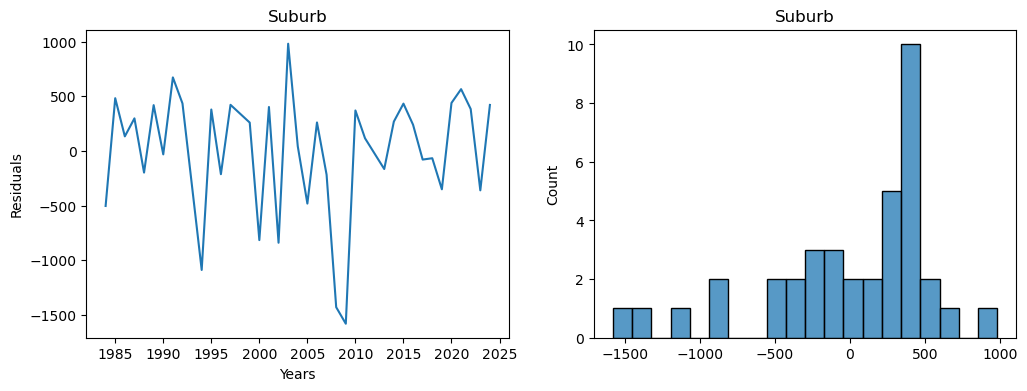

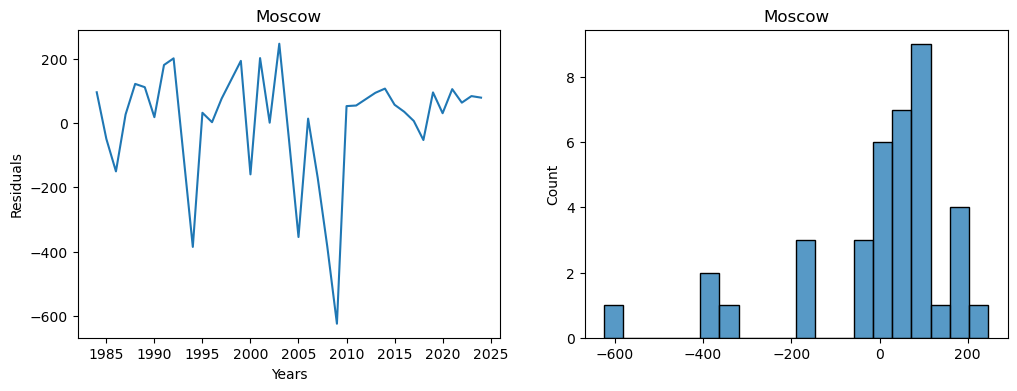

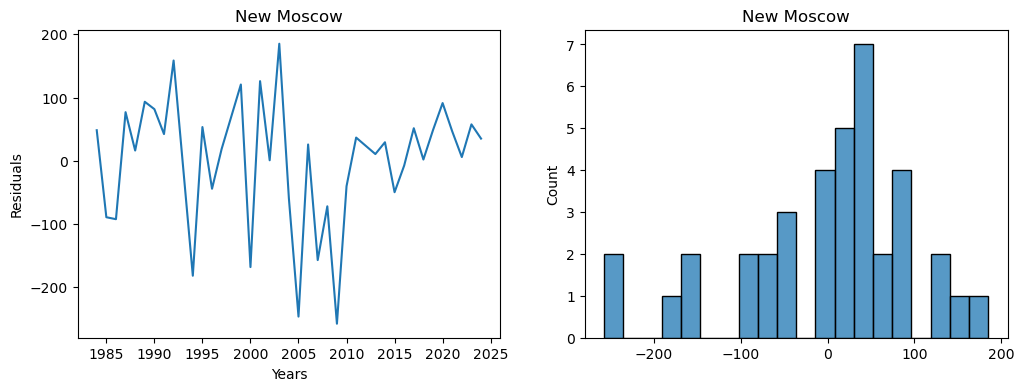

In [ ]:
for part in parts:

    y = df[df['type'] == part]['square'].values

    slope = results_df[results_df['zone'] == part]['slope'].values
    intercept = results_df[results_df['zone'] == part]['intercept'].values
    resid = y - (x * slope + intercept)

    dw = durbin_watson(resid)
    print(f'Durbin-Watson statistic for {part}: {dw}')

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    ax[0].plot(x, resid)
    ax[0].set_xlabel('Years')
    ax[0].set_ylabel('Residuals')
    ax[0].set_title(part)

    sns.histplot(resid, ax=ax[1], bins=20)
    ax[1].set_title(part)


Residuals look random. Distribution isn't true normal. In case of New Moscow looks normal-like

Durbin-Watson statistics are in [1,5; 2,5] range

## Estimate total area change for 2 extreme time slices

In [ ]:
lastdatas = pd.read_excel(r"D:\Kursach_2\analysis\first_and_last.xlsx")

In [ ]:
lastdatas.columns = ['type', 'square', 'years']

In [ ]:
lastdatas['square'] = lastdatas['square']/1000000

# Conversion from m2 to km2

In [ ]:
lastdatas

,type,square,years
0,Suburb,2020.877612,1984-1988
1,Moscow,773.466581,1984-1988
2,New Moscow,149.312679,1984-1988
3,Suburb,2727.086229,2020-2024
4,Moscow,923.526571,2020-2024
5,New Moscow,336.289818,2020-2024


In [ ]:
# Calculate dynamics values in % for two extreme 5-year periods

dynamics = {}
for type_uniq in lastdatas['type'].unique():
    zone = lastdatas.loc[lastdatas['type']==type_uniq]
    s1 = zone.loc[zone['years']=='1984-1988']['square']
    s2 = zone.loc[zone['years']=='2020-2024']['square']
    dynamics[type_uniq]=np.round(((float(s2)-float(s1))/float(s1)*100), 1)

C:\Users\malyu\AppData\Local\Temp\ipykernel_15944\839107871.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dynamics[type_uniq]=np.round(((float(s2)-float(s1))/float(s1)*100), 1)


In [ ]:
lastdatas['dynamics'] = lastdatas['type'].map(dynamics)

In [ ]:
lastdatas

,type,square,years,dynamics
0,Suburb,2020.877612,1984-1988,34.9
1,Moscow,773.466581,1984-1988,19.4
2,New Moscow,149.312679,1984-1988,125.2
3,Suburb,2727.086229,2020-2024,34.9
4,Moscow,923.526571,2020-2024,19.4
5,New Moscow,336.289818,2020-2024,125.2


### Plot graphs to compare SUHI areas of 2 extreme periods

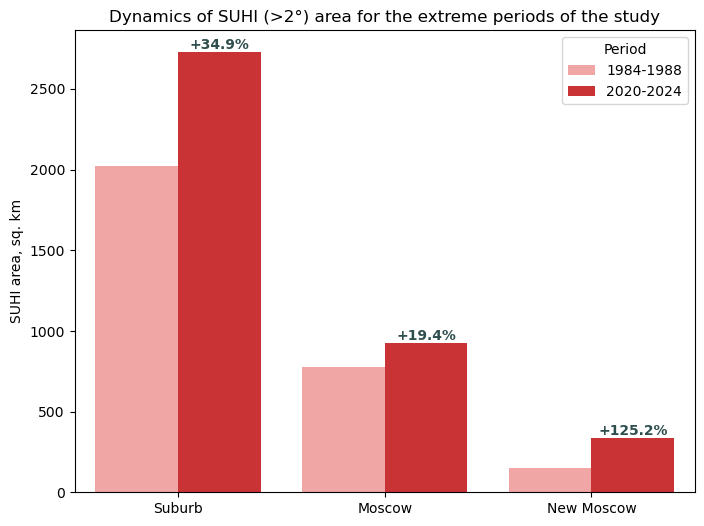

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(ax=ax, data=lastdatas, x='type', y='square', hue='years', palette=['#fb9a99', '#e31a1c'])

ax.set_ylabel('SUHI area, sq. km')
ax.set_xlabel('')

ax.legend(title='Period')

plt.title('Dynamics of SUHI (>2°) area for the extreme periods of the study')

# There are 2 `years` categories
# containers[0] are pink bars
# containers[1] are red bars
containers = ax.containers

# Get container with red bars
red_bars_container = containers[1]

# lastdatas['years'].unique()[1] is '2020-2024'
second_hue_value = lastdatas['years'].unique()[1]
second_hue_data = lastdatas[lastdatas['years'] == second_hue_value].reset_index(drop=True)

# Cycle for second container bars
for i, bar in enumerate(red_bars_container):
    # Bar height
    height = bar.get_height()
    # x-coordinate of bar's center
    x = bar.get_x() + bar.get_width()/2.0

    # Get dynamics from second_hue_data
    dyn_value = second_hue_data.loc[i, 'dynamics']

    # Form a sting like +XX.XX%
    label_text = f'+{dyn_value}%'

    # Add text above the bar
    ax.text(
        x,
        height,
        label_text,
        ha='center',
        va='bottom',
        color='darkslategrey',
        fontsize=10,
        fontweight='bold'
    )


fig.savefig(r"D:\Kursach_2\newpics\dynamics.png", bbox_inches='tight')
